<a href="https://colab.research.google.com/github/adimulamakshay/C2TC_COREJAVA/blob/main/PEST_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 236
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
train_data_dir = "dataset/train"
test_data_dir = "dataset/test"
val_data_dir = "dataset/val"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=10,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="sparse")

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode="sparse")

validation_generator = validation_datagen.flow_from_directory(
    val_data_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

Found 3841 images belonging to 12 classes.
Found 1109 images belonging to 12 classes.
Found 544 images belonging to 12 classes.


In [ ]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 12

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3,3), activation='relu', input_shape =input_shape,),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 234, 234, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 117, 117, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 115, 115, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 57, 57, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 64)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
544/32

17.0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch= 120,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=17,
    verbose=1,
    epochs=10
)

Epoch 1/10
120/120 [==============================] - 326s 3s/step - loss: 2.4171 - accuracy: 0.1431 - val_loss: 2.3520 - val_accuracy: 0.1801
Epoch 2/10
120/120 [==============================] - 301s 3s/step - loss: 2.2775 - accuracy: 0.1932 - val_loss: 2.2100 - val_accuracy: 0.2261
Epoch 3/10
120/120 [==============================] - 316s 3s/step - loss: 2.2585 - accuracy: 0.2011 - val_loss: 2.2789 - val_accuracy: 0.1746
Epoch 4/10
120/120 [==============================] - 312s 3s/step - loss: 2.1704 - accuracy: 0.2355 - val_loss: 2.1866 - val_accuracy: 0.2390
Epoch 5/10
120/120 [==============================] - 345s 3s/step - loss: 2.1619 - accuracy: 0.2347 - val_loss: 2.1371 - val_accuracy: 0.2574
Epoch 6/10
120/120 [==============================] - 310s 3s/step - loss: 2.0809 - accuracy: 0.2788 - val_loss: 2.0552 - val_accuracy: 0.3015
Epoch 7/10
120/120 [==============================] - 332s 3s/step - loss: 2.0214 - accuracy: 0.3069 - val_loss: 2.0414 - val_accuracy: 0.3254

In [ ]:
scores = model.evaluate(test_generator)

35/35 [==============================] - 52s 1s/step - loss: 1.9212 - accuracy: 0.3751


In [ ]:
scores

[1.921152949333191, 0.37511271238327026]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 120}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.1430821716785431,
 0.19322657585144043,
 0.20110264420509338,
 0.23549488186836243,
 0.23470726609230042,
 0.27881333231925964,
 0.30690470337867737,
 0.33840903639793396,
 0.35941192507743835,
 0.38015228509902954]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

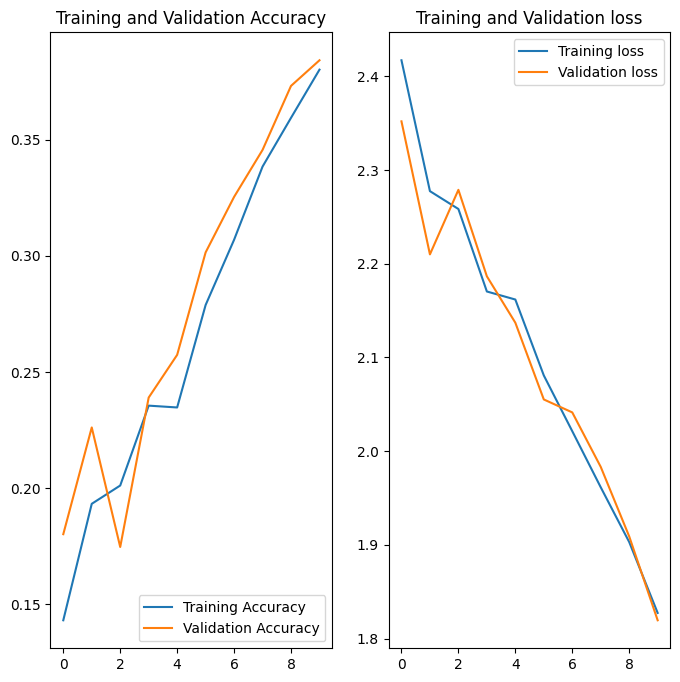

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss, label='Training loss')
plt.plot(range(10), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [ ]:
pest_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Pest_Detection",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )
class_names = pest_dataset.class_names
class_names

Found 5494 files belonging to 12 classes.


['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

first Image to predict
Actual label: bees
1/1 [==============================] - 1s 549ms/step
Predicted label bees


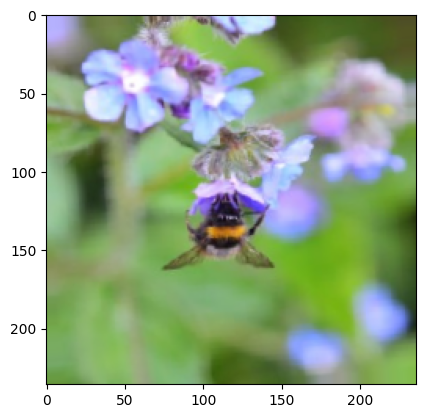

In [ ]:
import numpy as np

for images_batch, label_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(label_batch[0])

    print("first Image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label",class_names[np.argmax(batch_prediction[0])])

    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class,confidence

1/1 [==============================] - 0s 48ms/step


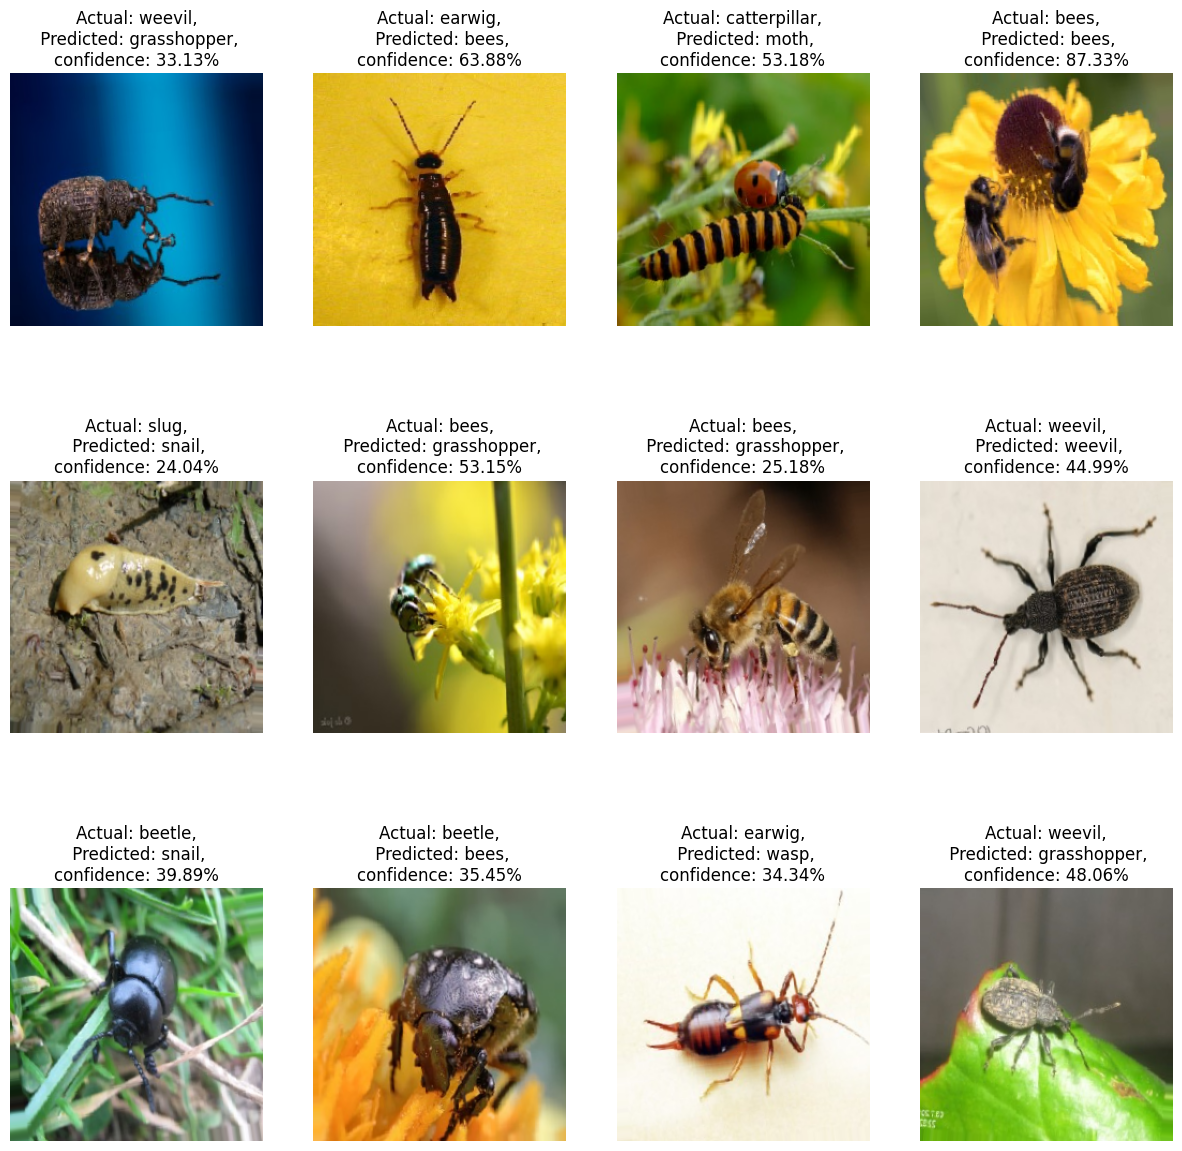

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model,images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\nconfidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
model.save("../model1.h5")

In [ ]:
score = model.evaluate(test_generator, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.37511271238327026


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

train_data_dir = "dataset/train"
test_data_dir = "dataset/test"
val_dat_dir = "dataset/val"

img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 30

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

def create_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(12, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

model1 = create_model(input_shape)

optimizer = Adam(learning_rate=0.0001)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Found 3841 images belonging to 12 classes.
Found 1109 images belonging to 12 classes.
Found 544 images belonging to 12 classes.
Epoch 1/30
120/120 [==============================] - 309s 3s/step - loss: 2.4540 - accuracy: 0.1197 - val_loss: 2.3936 - val_accuracy: 0.1857
Epoch 2/30
120/120 [==============================] - 319s 3s/step - loss: 2.3181 - accuracy: 0.1906 - val_loss: 2.2047 - val_accuracy: 0.2730
Epoch 3/30
120/120 [==============================] - 297s 2s/step - loss: 2.2207 - accuracy: 0.2413 - val_loss: 2.0968 - val_accuracy: 0.3318
Epoch 4/30
120/120 [==============================] - 293s 2s/step - loss: 2.1011 - accuracy: 0.2982 - val_loss: 2.0025 - val_accuracy: 0.3392
Epoch 5/30
120/120 [==============================] - 272s 2s/step - loss: 2.0069 - accuracy: 0.3269 - val_loss: 1.8635 - val_accuracy: 0.3971
Epoch 6/30
120/120 [==============================] - 257s 2s/step - loss: 1.9624 - accuracy: 0.3442 - val_loss: 1.8606 - val_accuracy: 0.3658
Epoch 7/30
120

In [ ]:
model1.history.history.keys()

In [ ]:
#summarize model for accuracy
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#summarize history for loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
model1.save("../model2.h5")

In [ ]:
score = model1.evaluate(test_generator, verbose=0)
print('Test accuracy:', score[1])

In [ ]:
#model 3
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16

train_data_dir = "dataset/train"
test_data_dir = "dataset/test"

img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 30

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

def create_model(input_shape):
    model = Sequential()

    # First Block
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Second Block
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Third Block
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fourth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fifth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Sixth Block
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=12, activation='softmax'))

    return model

model2 = create_model(input_shape)

# Use ReduceLROnPlateau callback for learning rate scheduling
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)

optimizer = Adam(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

In [ ]:
model2.history.history.keys()

In [ ]:
#summarize model for accuracy
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#summarize history for loss
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
model2.save("../model3.h5")

In [ ]:
score = model2.evaluate(test_generator, verbose=0)
print('Test accuracy:', score[1])

In [ ]:
# Model 4
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define image dimensions and number of classes
img_height, img_width = 224, 224
num_classes = 12

# Define train and test data directories
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_model(input_shape):
    model = Sequential()

    # First Block
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Second Block
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Third Block
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fourth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fifth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Sixth Block
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=12, activation='softmax'))

    return model

model3 = create_model(input_shape)

# Use ReduceLROnPlateau callback for learning rate scheduling
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)

# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model3.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    callbacks=[lr_scheduler])


In [ ]:
model3.history.history.keys()

In [ ]:
#summarize model for accuracy
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#summarize history for loss
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
model3.save("../model4.h5")

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model3.evaluate(test_data)
print('Test accuracy:', test_acc)

In [ ]:
# Model 5
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define image dimensions and number of classes
img_height, img_width = 224, 224
num_classes = 12

# Define train and test data directories
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_model(input_shape):
    model = Sequential()

    # First Block
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    # Second Block
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    # Third Block
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.5))

    # Fourth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.5))

    # Fifth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Seventh Block
    model.add(Dense(units=4096, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(units=1000, activation='softmax'))

    return model

model4 = create_model(input_shape)

opt = Adam(learning_rate=1e-4)
model4.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for more epochs with regularization
history = model4.fit(train_data,
                    epochs=25,
                    validation_data=test_data,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)])

In [ ]:
model4.history.history.keys()

In [ ]:
#summarize model for accuracy
plt.plot(model4.history.history['accuracy'])
plt.plot(model4.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#summarize history for loss
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
model4.save("../model5.h5")

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model4.evaluate(test_data)
print('Test accuracy:', test_acc)

In [ ]:
# Model 6
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Concatenate,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define image dimensions and number of classes
img_height, img_width = 229, 229
num_classes = 12

# Define train and test data directories
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_inceptionv3_model(input_shape, num_classes):
    # Create model architecture
    model = Sequential()

    # Stem
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='valid', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu'))
    model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))
    model.add(Conv2D(80, (1,1), strides=(1,1), padding='valid', activation='relu'))
    model.add(Conv2D(192, (3,3), strides=(1,1), padding='valid', activation='relu'))
    model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))

    # Inception A
    tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(model.output)
    tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(model.output)
    tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(model.output)
    tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    concat_1 = Concatenate()([tower_1, tower_2, tower_3])

    tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_1)
    tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_1)
    tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_1)
    tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    concat_2 = Concatenate()([tower_1, tower_2, tower_3])

    tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_2)
    tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_2)
    tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_2)
    tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    concat_3 = Concatenate()([tower_1, tower_2, tower_3])

    # Inception B
    tower_1 = Conv2D(192, (1,1), padding='same', activation='relu')(concat_3)
    tower_1 = Conv2D(192, (1,7), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(224, (7,1), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(224, (1,7), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(256, (7,1), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(192, (1,1), padding='same', activation='relu')(concat_3)
    tower_2 = Conv2D(192, (7,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(224, (1,7), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(224, (7,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(256, (1,7), padding='same', activation='relu')(tower_2)

    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_3)
    tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)

    concat_4 = Concatenate()([tower_1, tower_2, tower_3])

    # Inception C
    tower_1 = Conv2D(384, (1,1), padding='same', activation='relu')(concat_4)
    tower_1 = Conv2D(384, (1,3), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(448, (3,1), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(512, (1,3), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(512, (3,1), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(384, (1,1), padding='same', activation='relu')(concat_4)
    tower_2 = Conv2D(384, (3,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(448, (1,3), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(512, (3,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(512, (1,3), padding='same', activation='relu')(tower_2)

    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_4)
    tower_3 = Conv2D(512, (1,1), padding='same', activation='relu')(tower_3)

    concat_5 = Concatenate()([tower_1, tower_2, tower_3])
    gap = GlobalAveragePooling2D()(concat_5)
    dense_1 = Dense(1024, activation='relu')(gap)
    dropout = Dropout(0.4)(dense_1)
    dense_2 = Dense(num_classes, activation='softmax')(dropout)
    model = Model(inputs=model.inputs, outputs=dense_2)
    return model


model5 = create_inceptionv3_model(input_shape, num_classes)

opt = Adam(learning_rate=1e-4)
model5.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model for more epochs with regularization
history = model5.fit(train_data,
                    epochs=25,
                    validation_data=test_data,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)])


In [ ]:
model5.history.history.keys()

In [ ]:
#summarize model for accuracy
plt.plot(model5.history.history['accuracy'])
plt.plot(model5.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#summarize history for loss
plt.plot(model5.history.history['loss'])
plt.plot(model5.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
model5.save("../model6.h5")

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model5.evaluate(test_data)
print('Test accuracy:', test_acc)